<font style='font-size:1.5em'>DS105L – Data for Data Science</font>

<font style='font-size:1.2em'>**✍️ Project Work, web scrapping top rotten tomatoes information from wikipedia & rotten tomatoes**</font>

----

# Setup



# Import libraries

In [5]:
# Add your code here
import requests

import pandas as pd

from bs4 import BeautifulSoup

import numpy as np

# Let's go!

### First, we pull data from a wikipedia article for flims with 100% rating for Rotten Tomatoes

- Note that flims with 100% ratings does NOT mean 100% ***USER RATING***
- Note that this is not dissimilar to how other teammates collected their data as well! (not in terms of cross-referencing wikipedia and RT, but that we all selected "top" movies!)

In [6]:
# Add your web scraping code here
url_general_page = 'https://en.m.wikipedia.org/wiki/List_of_films_with_a_100%25_rating_on_Rotten_Tomatoes'
response = requests.get(url_general_page)
soup = BeautifulSoup(response.text)
# Find all links in the page
td = soup.find_all('td')

In [7]:
list_td = list(td)

# make ever 4th element in the list a new list, then convert them to a string and then splice the string to get the movie name
data = [str(list_td[i:i+4]) for i in range(0, len(list_td), 4)]

data[0]

'[<td><i><span data-sort-value="Golem: How He Came into the World\xa0!"><a href="/wiki/The_Golem:_How_He_Came_into_the_World" title="The Golem: How He Came into the World">The Golem: How He Came into the World</a></span></i>\n</td>, <td>1920\n</td>, <td>32\n</td>, <td><sup class="reference" id="cite_ref-11"><a href="#cite_note-11">[11]</a></sup></td>]'

### Next, from the wikipedia article, we pull the flims and then soup & request links to those flims on **rotten tomatoes** to fill in as much data as we can about those flims

In [8]:
# get movie name, movie year, cite note link and number of reviews from all movies

title_list = []
year_list = []
number_of_reviews_list = []
rotten_tomatoes_link_list = []
wiki_link_list = []
indiv_number_of_ratings_by_users_list = []
indiv_number_of_reviews_by_rotten_tomatoes_list = []
indiv_user_rating_list = []
indiv_genre_list = []
director_names_list = []
producers_list = []
writers_list = []
runtime_list = []


temp_var = 1752
for indiv in reversed(data):

    url_general_page = 'https://en.m.wikipedia.org/wiki/List_of_films_with_a_100%25_rating_on_Rotten_Tomatoes'
    response = requests.get(url_general_page)
    soup = BeautifulSoup(response.text)
    indiv_name = indiv.split('title="')[1].split('"')[0]
    indiv_year = indiv.split('</i>\n</td>, <td>')[1].split('\n</td>')[0]
    indiv_number_of_reviews = indiv.split('</i>\n</td>, <td>')[1].split('\n</td>, <td>')[1].split('\n</td>')[0]
    

    wiki_link = 'https://en.m.wikipedia.org' + soup.find_all('td')[temp_var].find('a')['href']
    if 'redlink' in wiki_link:
        wiki_link = None
    temp_var -= 4
    
    if temp_var == 0:
        break

    # finding the rotten tomatoes link
    indiv_note_link = 'cite_note-' + indiv.split('cite_note-')[1].split('"')[0]
    indiv_ref = str(soup.find(id= indiv_note_link))
    indiv_rotten_tomatoes_link = indiv_ref.split('text" href="')[1].split('"')[0]

    rotten_tomatoes_link = indiv_rotten_tomatoes_link
    request = requests.get(rotten_tomatoes_link)
    soup = BeautifulSoup(request.text)
    score_stats = str(soup.find_all('score-board'))

    try:
        indiv_user_rating = score_stats.split('audiencescore="')[1].split('"')[0] + '%'
    except IndexError:
        indiv_user_rating = None
        continue

    if indiv_user_rating == '%':
        indiv_user_rating = None

    indiv_number_of_reviews_by_rotten_tomatoes = score_stats.split('critics-count">\n')[1].split('\n')[0]
    indiv_number_of_reviews_by_rotten_tomatoes = indiv_number_of_reviews_by_rotten_tomatoes.strip()

    indiv_number_of_ratings_by_users = score_stats.split('audience-count">\n')[1].split('</a')[0]
    indiv_number_of_ratings_by_users = indiv_number_of_ratings_by_users.strip()

    # now for each indiv, we want to go to the rotten tomatoes link and get the synopsis, the user rating, number of reviews by rotten tomatoes, number of ratings by users, 
    # the genre, director, producer, writer, and runtime

    try:
        indiv_genre = str(soup.find_all('li', class_='info-item')).split('genre"="')[1].split('">\n')[1].split('\n')[1].strip()
    except IndexError:
        continue
    
    x = (soup.find_all('li', class_='info-item'))


    director_names = []
    for item in x:
        label = item.find('b', class_='info-item-label')
        if label and label.text.strip() == 'Director:':
            director_links = item.find_all('a', href=True, attrs={'data-qa': 'movie-info-director'})
            for link in director_links:
                director_names.append(link.text)



    producers = []
    producer_spans = soup.find_all('span', class_='info-item-value')
    for span in producer_spans:
        if 'Producer' in span.previous_sibling.previous_sibling.text:
          producer_links = span.find_all('a')
          for link in producer_links:
              producers.append(link.text)

    writers = []
    for item in x:
        label = item.find('b', class_='info-item-label')
        if label and label.text.strip() == 'Writer:':
            values = item.find_all('a')
            for v in values:
                writers.append(v.text)

    runtime = ''
    x = soup.find_all('li', {'class': 'info-item'})
    for item in x:
        label = item.find('b', {'class': 'info-item-label'})
        if label is not None and label.text.strip() == 'Runtime:':
            runtime = item.find('time').text.strip()
            break

###### study the above code and understand it better later

    title_list.append(indiv_name)
    year_list.append(indiv_year)
    number_of_reviews_list.append(indiv_number_of_reviews)
    rotten_tomatoes_link_list.append(indiv_rotten_tomatoes_link)
    wiki_link_list.append(wiki_link)
    indiv_number_of_ratings_by_users_list.append(indiv_number_of_ratings_by_users)
    indiv_number_of_reviews_by_rotten_tomatoes_list.append(indiv_number_of_reviews_by_rotten_tomatoes)
    indiv_user_rating_list.append(indiv_user_rating)
    indiv_genre_list.append(indiv_genre)
    director_names_list.append(director_names)
    producers_list.append(producers)
    writers_list.append(writers)
    runtime_list.append(runtime)
    

    df = pd.DataFrame({'title': title_list, 'year': year_list, 'number_of_reviews': number_of_reviews_list, 'rotten_tomatoes_link': rotten_tomatoes_link_list, 'wiki_link': wiki_link_list, 'number_of_ratings_by_users': indiv_number_of_ratings_by_users_list, 'number_of_reviews_by_rotten_tomatoes': indiv_number_of_reviews_by_rotten_tomatoes_list, 'user_rating': indiv_user_rating_list, 'genre': indiv_genre_list, 'director': director_names_list, 'producer': producers_list, 'writer': writers_list, 'runtime': runtime_list})
    df_main = df




### Basic data cleaning I : We then clean our data by removing the following

- "Faulty" revenue as some revenue data are in the wrong format
- We created 3 dataframes (df_main is just a copy of the original dataframe df to serve as a backup in case anything goes wrong and dfa is just an exploded list of movies from Directors)
- Dropped rows with any null values

In [9]:
import re  
list_of_revenue = []
revenue = None
for row in df['wiki_link']:
    
    rotten_tomatoes_link = row

    if row != None:
        request = requests.get(rotten_tomatoes_link)
        soup = BeautifulSoup(request.text)
        temp_var = (soup.find_all('tr'))
        for row in temp_var:
            label = row.find('th', {'class': 'infobox-label'})
            if label and label.text.strip() == 'Box office':
                revenue = row.find('td', {'class': 'infobox-data'}).text.strip()
    
    

        

    if revenue == None or row == None:
        list_of_revenue.append(None)
    else:
        list_of_revenue.append(revenue)

    #clean the list of revenue
    #remove everything in square brackets including square brackets from revenue
    lst = list_of_revenue

    cleaned_lst = []
    for item in lst:
        if item == None:
            cleaned_lst.append(item)
        else:
            cleaned_lst.append(re.sub(r'\[.*?\]', '', item))




In [10]:
#add a new column to the df called revenue and add the list to it
df['revenue'] = cleaned_lst

In [11]:
#remove the comma in the genre column
df['genre'] = df['genre'].str.replace(',', '')
df.sort_values(by='genre', inplace=True)

# the director column is a list now. If there are more than one directors, there will be more than one element in the list.
# if there is only one director, there will be only one element in the list
# if there is more than one director, i want to make each director a separate row
# if there is only one director, i want to keep it as it is



dfa = df.explode('director')
dfa.sort_values(by='director', inplace=True)

In [12]:
df

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
353,A Man Escaped,1956,40,https://www.rottentomatoes.com/m/man_escaped/,https://en.m.wikipedia.org/wiki/Touchez_pas_au...,"5,000+ Ratings",40 Reviews,93%,Action,[Robert Bresson],"[Alain Poiré, Jean Thuillier]",[],1h 42m,"4,710,496 admissions (France)$131,548(2003 US ..."
357,Seven Samurai,1954,95,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/The_Band_Wagon,"50,000+ Ratings",95 Reviews,97%,Action,[Akira Kurosawa],[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",3h 28m,$3.5 million
391,Gentleman Jim (film),1941,25,https://www.rottentomatoes.com/m/gentleman_jim,https://en.m.wikipedia.org/wiki/The_Thief_of_B...,500+ Ratings,25 Reviews,85%,Action,[Raoul Walsh],[Robert Buckner],"[Vincent Lawrence, Horace McCoy]",1h 44m,"over $1 million (US/Canada)5,134,653 admission..."
323,Dragon Inn,1967,24,https://www.rottentomatoes.com/m/dragon-inn-lo...,https://en.m.wikipedia.org/wiki/El_Dorado_(196...,100+ Ratings,24 Reviews,85%,Action,[King Hu],[L.S. Chang],[King Hu],1h 51m,"$5,950,000 (US/ Canada)"
180,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/The_Circle_(20...,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",2h 0m,"$30,407"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,The Shooting,1966,20,https://www.rottentomatoes.com/m/1018885-shooting,https://en.m.wikipedia.org/wiki/I_Am_Cuba,"1,000+ Ratings",20 Reviews,64%,Western,[Monte Hellman],"[Monte Hellman, Jack Nicholson]",[],1h 22m,$20 million
381,My Darling Clementine,1946,32,https://www.rottentomatoes.com/m/my_darling_cl...,https://en.m.wikipedia.org/wiki/National_Velve...,"5,000+ Ratings",32 Reviews,86%,Western,[John Ford],[Samuel G. Engel],"[Samuel G. Engel, Sam Hellman, Stuart N. Lake,...",1h 37m,"$5,840,000"
375,Red River (1948 film),1948,32,https://www.rottentomatoes.com/m/red_river/,https://en.m.wikipedia.org/wiki/Black_Narcissus,"5,000+ Ratings",33 Reviews,87%,Western,[Howard Hawks],[Howard Hawks],"[Borden Chase, Charles Schnee]",2h 13m,US$1.25 million (US rentals)
372,Fort Apache (film),1948,21,https://www.rottentomatoes.com/m/fort_apache,https://en.m.wikipedia.org/wiki/The_Treasure_o...,"5,000+ Ratings",21 Reviews,82%,Western,[John Ford],[],"[James Warner Bellah, Frank S. Nugent]",2h 7m,$4.1 million


In [13]:
dfa

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
90,Chained for Life (2019 film),2019,52,https://www.rottentomatoes.com/m/chained_for_l...,https://en.m.wikipedia.org/wiki/Mystify:_Micha...,Fewer than 50 Ratings,53 Reviews,54%,Drama,Aaron Schimberg,"[Daniel Patrick Carbone, Vanessa McDonnell, Ma...",[Aaron Schimberg],1h 31m,$1.1 million
160,Off the Rails (2016 film),2016,24,https://www.rottentomatoes.com/m/off_the_rails...,https://en.m.wikipedia.org/wiki/California_Typ...,100+ Ratings,24 Reviews,85%,Documentary,Adam Irving,"[Adam Irving, Glen Zipper]","[Tchavdar Georgiev, Adam Irving]",1h 26m,"$218,563"
170,For the Love of Spock,2016,31,https://www.rottentomatoes.com/m/for_the_love_...,https://en.m.wikipedia.org/wiki/The_Dresser_(2...,"1,000+ Ratings",31 Reviews,82%,Documentary,Adam Nimoy,"[Joseph Kornbrodt, Kevin Layne, David Zappone,...",[],1h 40m,$15.2 million
285,Vagabond (1985 film),1985,22,https://www.rottentomatoes.com/m/vagabond,https://en.m.wikipedia.org/wiki/Threads_(1984_...,"1,000+ Ratings",23 Reviews,85%,Drama,Agnès Varda,[Oury Milshtein],[Agnès Varda],1h 45m,$21 million
42,Cousins (2021 film),2021,24,https://www.rottentomatoes.com/m/cousins_2021,https://en.m.wikipedia.org/wiki/Slalom_(2020_f...,Fewer than 50 Ratings,24 Reviews,None,Drama,Ainsley Gardiner,"[Georgina Allison Conder, Ainsley Gardiner, Li...","[Briar Grace Smith, Briar Grace Smith]",1h 38m,"$573,005"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Pahokee (film),2019,22,https://www.rottentomatoes.com/m/pahokee,https://en.m.wikipedia.org/wiki/Gay_Chorus_Dee...,Fewer than 50 Ratings,22 Reviews,None,Documentary,NaN,"[Patrick Bresnan, Ivete Lucas]",[],1h 50m,"$24,897"
55,Mayor (film),2020,44,https://www.rottentomatoes.com/m/mayor,https://en.m.wikipedia.org/wiki/76_Days,Fewer than 50 Ratings,44 Reviews,86%,Documentary,NaN,[],[],1h 29m,$ 812 957
117,Dead Souls (2018 film),2018,22,https://www.rottentomatoes.com/m/dead_souls_2018,https://en.m.wikipedia.org/wiki/Bathtubs_Over_...,Fewer than 50 Ratings,22 Reviews,None,Documentary,NaN,[],[],8h 26m,"$328,644"
40,Miracle (2021 film) (page does not exist),2021,22,https://www.rottentomatoes.com/m/miracle_2021,"https://en.m.wikipedia.org/wiki/Introducing,_S...",Fewer than 50 Ratings,22 Reviews,None,Drama,NaN,[Oana Iancu],[],1h 58m,"$5,700"


In [14]:
df_main

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
353,A Man Escaped,1956,40,https://www.rottentomatoes.com/m/man_escaped/,https://en.m.wikipedia.org/wiki/Touchez_pas_au...,"5,000+ Ratings",40 Reviews,93%,Action,[Robert Bresson],"[Alain Poiré, Jean Thuillier]",[],1h 42m,"4,710,496 admissions (France)$131,548(2003 US ..."
357,Seven Samurai,1954,95,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/The_Band_Wagon,"50,000+ Ratings",95 Reviews,97%,Action,[Akira Kurosawa],[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",3h 28m,$3.5 million
391,Gentleman Jim (film),1941,25,https://www.rottentomatoes.com/m/gentleman_jim,https://en.m.wikipedia.org/wiki/The_Thief_of_B...,500+ Ratings,25 Reviews,85%,Action,[Raoul Walsh],[Robert Buckner],"[Vincent Lawrence, Horace McCoy]",1h 44m,"over $1 million (US/Canada)5,134,653 admission..."
323,Dragon Inn,1967,24,https://www.rottentomatoes.com/m/dragon-inn-lo...,https://en.m.wikipedia.org/wiki/El_Dorado_(196...,100+ Ratings,24 Reviews,85%,Action,[King Hu],[L.S. Chang],[King Hu],1h 51m,"$5,950,000 (US/ Canada)"
180,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/The_Circle_(20...,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",2h 0m,"$30,407"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,The Shooting,1966,20,https://www.rottentomatoes.com/m/1018885-shooting,https://en.m.wikipedia.org/wiki/I_Am_Cuba,"1,000+ Ratings",20 Reviews,64%,Western,[Monte Hellman],"[Monte Hellman, Jack Nicholson]",[],1h 22m,$20 million
381,My Darling Clementine,1946,32,https://www.rottentomatoes.com/m/my_darling_cl...,https://en.m.wikipedia.org/wiki/National_Velve...,"5,000+ Ratings",32 Reviews,86%,Western,[John Ford],[Samuel G. Engel],"[Samuel G. Engel, Sam Hellman, Stuart N. Lake,...",1h 37m,"$5,840,000"
375,Red River (1948 film),1948,32,https://www.rottentomatoes.com/m/red_river/,https://en.m.wikipedia.org/wiki/Black_Narcissus,"5,000+ Ratings",33 Reviews,87%,Western,[Howard Hawks],[Howard Hawks],"[Borden Chase, Charles Schnee]",2h 13m,US$1.25 million (US rentals)
372,Fort Apache (film),1948,21,https://www.rottentomatoes.com/m/fort_apache,https://en.m.wikipedia.org/wiki/The_Treasure_o...,"5,000+ Ratings",21 Reviews,82%,Western,[John Ford],[],"[James Warner Bellah, Frank S. Nugent]",2h 7m,$4.1 million


In [15]:
#drop the rows where any column has a null value
dfa1 = dfa.dropna()
df1 = df.dropna()
df_main_1 = df_main.dropna()

### Data cleaning II: Enhanced cleaning to ensure homogeneity and standardisation of revenue, movie runtime in minutes, and pre-analysis of number of voters 

- Since all the movies collected from other teammates were in US, I wanted to ensure homogeneity by removing all non-US flims by looking at their currency!
- I also standardised all movie runtimes to display in minutes as some were in hours and minutes and others just in minutes
- I also did some analysis like value_counts()/describe() to check if number of voters are in absolute figures or in bands to help us in later sections

In [16]:
# clean the date so that no revenue that has a currency other than USD is excluded


keywords = ["¥", "Spain", "France", "Singapore", "Australia", "tickets", "ticket", "admissions", "admission", "₹", "Canada", "rentals","\\", "(", ")", "£", "over", "Precise"]

def remove_all_except_USD(dataframe):
    temp_list = []
    for entry in dataframe['revenue']:
        if any(keyword in entry for keyword in keywords):
            temp_list.append(None)
        else:
            temp_list.append(entry)
    dataframe.loc[:,'revenue'] = temp_list
    return dataframe

df1 = remove_all_except_USD(df1)
df1.dropna(inplace=True)
df_main_1 = remove_all_except_USD(df_main_1)
df_main_1.dropna(inplace=True)
dfa1 = remove_all_except_USD(dfa1)
dfa1.dropna(inplace=True)


C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2776854741.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'revenue'] = temp_list
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2776854741.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2776854741.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [17]:
million_keywords = ["million", "Million", "millions", "Millions"]
thousand_keywords = ["thousand", "Thousand", "thousands", "Thousands"]
def process_revenue(df):
    for i in range(len(df)):
        revenue = df.iloc[i, df.columns.get_loc('revenue')]
        revenue = str(revenue)
        if any(keyword in revenue for keyword in million_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('million', '').replace(' ', '').replace('US', '').replace('Million', '').replace('Millions', '').replace('millions', '')
                if revenue =='100–150':
                        revenue = 125
                revenue = (float(revenue) * 1000000)
        elif any(keyword in revenue for keyword in thousand_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('thousand', '').replace(' ', '').replace('US', '').replace('Thousand', '').replace('Thousands', '').replace('thousands', '')
                revenue = (float(revenue) * 1000)
        else:
                revenue = revenue.replace('$', '').replace(',', '').replace(' ', '').replace('US', '')
                revenue = float(revenue)

        df.iloc[i, df.columns.get_loc('revenue')] = revenue
    return df


dfa2 = process_revenue(dfa1)
df2 = process_revenue(df1)
df_main_2 = process_revenue(df_main_1)



C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2097072378.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i, df.columns.get_loc('revenue')] = revenue


#### Side point that's part of data cleanning II : So from here, I cut df to 250 to match what my teammates are doing. You might be asking, why then collect 424 movies? Well, the reason is because I won't know how many movies are left after I drop rows with empty data!

In [18]:
#set max rows to 251

df_main_3 = df_main_2.iloc[0:250,:]

dfa3 = df_main_3.explode('director')
dfa3.sort_values(by='director', inplace=True)

df3=df_main_3.sort_values(by='genre')
dfa3

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
90,Chained for Life (2019 film),2019,52,https://www.rottentomatoes.com/m/chained_for_l...,https://en.m.wikipedia.org/wiki/Mystify:_Micha...,Fewer than 50 Ratings,53 Reviews,54%,Drama,Aaron Schimberg,"[Daniel Patrick Carbone, Vanessa McDonnell, Ma...",[Aaron Schimberg],1h 31m,1100000.0
160,Off the Rails (2016 film),2016,24,https://www.rottentomatoes.com/m/off_the_rails...,https://en.m.wikipedia.org/wiki/California_Typ...,100+ Ratings,24 Reviews,85%,Documentary,Adam Irving,"[Adam Irving, Glen Zipper]","[Tchavdar Georgiev, Adam Irving]",1h 26m,218563.0
170,For the Love of Spock,2016,31,https://www.rottentomatoes.com/m/for_the_love_...,https://en.m.wikipedia.org/wiki/The_Dresser_(2...,"1,000+ Ratings",31 Reviews,82%,Documentary,Adam Nimoy,"[Joseph Kornbrodt, Kevin Layne, David Zappone,...",[],1h 40m,15200000.0
285,Vagabond (1985 film),1985,22,https://www.rottentomatoes.com/m/vagabond,https://en.m.wikipedia.org/wiki/Threads_(1984_...,"1,000+ Ratings",23 Reviews,85%,Drama,Agnès Varda,[Oury Milshtein],[Agnès Varda],1h 45m,21000000.0
357,Seven Samurai,1954,95,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/The_Band_Wagon,"50,000+ Ratings",95 Reviews,97%,Action,Akira Kurosawa,[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",3h 28m,3500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,"I Was Born, But...",1932,23,https://www.rottentomatoes.com/m/i_was_born_but,https://en.m.wikipedia.org/wiki/Un_Chien_Andalou,500+ Ratings,23 Reviews,90%,Comedy,Yasujirô Ozu,[],[],1h 40m,557000.0
166,Seoul Station (film),2016,23,https://www.rottentomatoes.com/m/seoul_station,https://en.m.wikipedia.org/wiki/O.J.:_Made_in_...,250+ Ratings,23 Reviews,38%,Horror,Yeon Sang-ho,"[Lee Dong-ha, Suh Youngjoo, Yeon Sang-ho]",[Yeon Sang-ho],1h 32m,15200000.0
217,Planet of Snail (page does not exist),2011,29,https://www.rottentomatoes.com/m/planet_of_sna...,https://en.m.wikipedia.org/wiki/Everyday_Sunsh...,"1,000+ Ratings",29 Reviews,73%,Documentary,Yi Seung-jun,"[Kim Min-chul, Gary Kam]",[],1h 27m,2200000.0
198,Hilda (film) (page does not exist),2014,20,https://www.rottentomatoes.com/m/hilda,https://en.m.wikipedia.org/wiki/Cultural_depic...,Fewer than 50 Ratings,20 Reviews,72%,Comedy,NaN,"[Nicolás Celis, Gabriel Nuncio]",[],1h 29m,34017.0


In [19]:
for index,row in df3.iterrows():
    if row["runtime"] == "":
        df3.drop(index, inplace=True)

for index,row in dfa3.iterrows():
    if row["runtime"] == "":
        dfa3.drop(index, inplace=True)

for index,row in df_main_3.iterrows():
    if row["runtime"] == "":
        df_main_3.drop(index, inplace=True)

C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2233632488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_3.drop(index, inplace=True)


In [20]:
#convert to minutes

def get_list_of_minutes(df):
    list_of_minutes = []
    for index, row in df.iterrows():
        row["runtime"] = str(row["runtime"])
        if row["runtime"][1] != "h":
            row["runtime"] = row["runtime"].replace("m", "").replace(" ", "")
            row["runtime"] = int(row["runtime"])
        elif row["runtime"][1] == "h":
            row["runtime"] = (
                int(row["runtime"].replace(" ", "").split("h")[0])
                * 60
                + int(row["runtime"].replace(" ", "").split("h")[1].split("m")[0])
            )
        list_of_minutes.append(row["runtime"])
    return list_of_minutes



list_of_minutes = get_list_of_minutes(df3)
df3.loc[:,'runtime'] = list_of_minutes
df3.rename(columns={'runtime': 'runtime_in_minutes'}, inplace=True)


list_of_minutes = get_list_of_minutes(dfa3)
dfa3.loc[:,'runtime'] = list_of_minutes
dfa3.rename(columns={'runtime': 'runtime_in_minutes'}, inplace=True)

list_of_minutes = get_list_of_minutes(df_main_3)
df_main_3.loc[:,'runtime'] = list_of_minutes
df_main_3.rename(columns={'runtime': 'runtime_in_minutes'}, inplace=True)


C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\649022278.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[:,'runtime'] = list_of_minutes
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\649022278.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfa3.loc[:,'runtime'] = list_of_minutes
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\649022278.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [21]:
table = dfa3.value_counts('number_of_ratings_by_users')
table = pd.DataFrame(table)
table.reset_index(inplace=True)
table.rename(columns = {0:"number"}).sort_values(by='number_of_ratings_by_users', ascending=False)

#"Fewer than 50 Verified Ratings" & "Fewer than 50 Ratings" = 0.1 multiplier
#"50+ Ratings" = 0.2 multiplier
#"100+ Ratings" & "50+ Verified Ratings" = 0.3 multplier
#"250+ Ratings" & "100+ Verified Ratings" = 0.4 multiplier
#"500+ Ratings" & "250+ Verified Ratings" = 0.5 multiplier
#"1,000+ Ratings" = 0.6 multiplier
#"2,500+ Ratings" = 0.7 multiplier
#"5,000+ Ratings" = 0.8 multiplier
#"10,000+ Ratings" = 0.9 multiplier
#"25,000+ Ratings" = 1.0 multiplier
#"50,000+ Ratings" = 1.1 multiplier
#"100,000+ Ratings" = 1.2 multiplier
#"250,000+ Ratings" = 1.3 multiplier

,number_of_ratings_by_users,number
12,Fewer than 50 Verified Ratings,3
0,Fewer than 50 Ratings,49
4,500+ Ratings,33
11,"50,000+ Ratings",3
5,50+ Ratings,25
1,"5,000+ Ratings",36
10,"250,000+ Ratings",3
14,250+ Verified Ratings,1
7,250+ Ratings,24
9,"25,000+ Ratings",8


# Data Processing - Composite score for movies


## First, we rate the movies via the following formula:
- composite_rating_score has a 50% weightage. This is calculated by multiplying the user rating (already expressed as a percentage) by the multiplier.
- the multiplier will be calculated based on the number of ratings the movie has. The more ratings the movie has, the higher the multiplier.
- revenue has a 50% weightage
- to calculate the revenue score, we first scale it according to US inflation based on number of years since the movie was released to 2023
- then we group their revenues into different bands and assign a score to each band to arrive at the revenue score

#### <span style="color:red">**Therefore, composite_movie_score = composite_rating_score * 0.5 + revenue_score * 0.5** </span>

---


## Next, we rate the directors via the following formula (Note: this part is only done for this analysis as the feedback from class teachers was that they wanted us to look between sources instead of directors, and we agreed that that would be more interesting):
#### director_score = (average of all the composite_movie_scores of the movies the director has worked in)*(90%) + score from number of movies the director has worked in * (10%)
- number of movies the director has worked in is given some weighting (10%) 
- since the more movies the director is in in this list means more movies he/she/it made a movie that got a 100% rotten tomattoes score

In [22]:
dfa3test = dfa3.dropna()

##### We followed the feedback received from our code in Week 11 to avoid cyclomatic complexity. The following code tries to use disctionaries and vectorised operations

In [23]:
def composite_rating_score_list(DF):
    # Python Dictionary for Score Bands
    rating_to_multiplier = {
        "Fewer than 50 Verified Ratings": 0.2,
        "Fewer than 50 Ratings": 0.3,
        "50+ Ratings": 0.4,
        "100+ Ratings": 0.5,
        "50+ Verified Ratings": 0.6,
        "250+ Ratings": 0.65,
        "100+ Verified Ratings": 0.7,
        "500+ Ratings": 0.74,
        "250+ Verified Ratings": 0.78,
        "1,000+ Ratings": 0.81,
        "2,500+ Ratings": 0.84,
        "5,000+ Ratings": 0.86,
        "10,000+ Ratings": 0.9,
        "25,000+ Ratings": 0.95,
        "50,000+ Ratings": 0.97,
        "100,000+ Ratings": 0.99,
        "250,000+ Ratings": 1
    }

    # Vectorized Pandas Functions
    DF["user_rating"] = DF["user_rating"].str.replace("%", "").astype(int)
    DF["multiplier"] = DF["number_of_ratings_by_users"].map(rating_to_multiplier)
    DF["indiv_composite_rating"] = (DF["multiplier"] * DF["user_rating"] / 100 * 0.5).round(6)
    temp_list = DF["indiv_composite_rating"].tolist()

    return temp_list


In [24]:

import numpy as np
#average inflation rate in US 1950-2022 is ~3.5%
def get_composite_revenue_score_list(DF):
    temp_list = []
    for index,row in DF.iterrows():
        if index != 0:
               row["year"] = int(row["year"])
               year_diff = 2023 - row["year"]
               scaled_revenue = 1.035**year_diff * row["revenue"]
               temp_list.append(scaled_revenue)
               
    return temp_list

def scaled_revenue_grouped_list(list):
     bins = [5000,10000,100000,250000,1000000,2500000,10000000,100000000,250000000,1000000000,10000000000]
     temp_df = list
     temp_cat = pd.cut(temp_df,bins) 
     return temp_cat

# learning lesson, don't convert to pandas series to use .cut() method, use the list itself or else the thing becomes wonky for some reason?????


def revenue_score_band(list):
    # Create a dictionary to map the score band strings to their corresponding values
    score_band_dict = {
        "(5000, 10000] ": 0.1,
        "(10000, 100000]": 0.2,
        "(100000, 250000]": 0.3,
        "(250000, 1000000]": 0.4,
        "(1000000, 2500000]": 0.5,
        "(2500000, 10000000]": 0.6,
        "(10000000, 100000000]": 0.7,
        "(100000000, 250000000]": 0.8,
        "(250000000, 1000000000]": 0.9,
        "(1000000000, 10000000000]": 1
    }
    
    # Convert each entry in the list to a string and then map it using the dictionary
    indiv_rev_score_band = [score_band_dict.get(str(x), 0) * 0.5 for x in list]


    return indiv_rev_score_band





In [25]:
#set the scaled_revenue column to 6 decimal places
pd.options.display.float_format = '{:,.6f}'.format

dfa3test.loc[:,"composite_rating_score"] = composite_rating_score_list(dfa3test)
dfa3test.loc[:,"scaled_revenue"] = (get_composite_revenue_score_list(dfa3test))
dfa3test.loc[:,"scaled_revenue_grouped"] = scaled_revenue_grouped_list(get_composite_revenue_score_list(dfa3test))
dfa3test.loc[:,"revenue_score"] = revenue_score_band(scaled_revenue_grouped_list(get_composite_revenue_score_list(dfa3test)))
dfa3test.loc[:,"overall_composite_movie_score"] = dfa3test["composite_rating_score"] + dfa3test["revenue_score"]

C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\1871208779.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["user_rating"] = DF["user_rating"].str.replace("%", "").astype(int)
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\1871208779.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["multiplier"] = DF["number_of_ratings_by_users"].map(rating_to_multiplier)
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\1871208779.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [26]:
dfa3test

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,...,writer,runtime_in_minutes,revenue,multiplier,indiv_composite_rating,composite_rating_score,scaled_revenue,scaled_revenue_grouped,revenue_score,overall_composite_movie_score
90,Chained for Life (2019 film),2019,52,https://www.rottentomatoes.com/m/chained_for_l...,https://en.m.wikipedia.org/wiki/Mystify:_Micha...,Fewer than 50 Ratings,53 Reviews,54,Drama,Aaron Schimberg,...,[Aaron Schimberg],91,"1,100,000.000000",0.300000,0.081000,0.081000,"1,262,275.300687","(1000000, 2500000]",0.250000,0.331000
160,Off the Rails (2016 film),2016,24,https://www.rottentomatoes.com/m/off_the_rails...,https://en.m.wikipedia.org/wiki/California_Typ...,100+ Ratings,24 Reviews,85,Documentary,Adam Irving,...,"[Tchavdar Georgiev, Adam Irving]",86,"218,563.000000",0.500000,0.212500,0.212500,"278,073.172508","(250000, 1000000]",0.200000,0.412500
170,For the Love of Spock,2016,31,https://www.rottentomatoes.com/m/for_the_love_...,https://en.m.wikipedia.org/wiki/The_Dresser_(2...,"1,000+ Ratings",31 Reviews,82,Documentary,Adam Nimoy,...,[],100,"15,200,000.000000",0.810000,0.332100,0.332100,"19,338,644.794052","(10000000, 100000000]",0.350000,0.682100
285,Vagabond (1985 film),1985,22,https://www.rottentomatoes.com/m/vagabond,https://en.m.wikipedia.org/wiki/Threads_(1984_...,"1,000+ Ratings",23 Reviews,85,Drama,Agnès Varda,...,[Agnès Varda],105,"21,000,000.000000",0.810000,0.344250,0.344250,"77,616,237.620133","(10000000, 100000000]",0.350000,0.694250
357,Seven Samurai,1954,95,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/The_Band_Wagon,"50,000+ Ratings",95 Reviews,97,Action,Akira Kurosawa,...,"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",208,"3,500,000.000000",0.970000,0.470450,0.470450,"37,579,602.330769","(10000000, 100000000]",0.350000,0.820450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Love and Death,1975,23,https://www.rottentomatoes.com/m/love_and_death/,https://en.m.wikipedia.org/wiki/Fat_City_(film),"10,000+ Ratings",23 Reviews,90,Comedy,Woody Allen,...,[Woody Allen],85,"18,300,000.000000",0.900000,0.405000,0.405000,"95,408,678.343615","(10000000, 100000000]",0.350000,0.755000
104,Horror Noire,2019,32,https://www.rottentomatoes.com/m/horror_noire_...,https://en.m.wikipedia.org/wiki/Sharkwater_Ext...,50+ Ratings,32 Reviews,67,Documentary,Xavier Burgin,...,"[Ashlee Blackwell, Danielle Burrows]",83,"1,315,037.000000",0.400000,0.134000,0.134000,"1,509,035.204173","(1000000, 2500000]",0.250000,0.384000
415,"I Was Born, But...",1932,23,https://www.rottentomatoes.com/m/i_was_born_but,https://en.m.wikipedia.org/wiki/Un_Chien_Andalou,500+ Ratings,23 Reviews,90,Comedy,Yasujirô Ozu,...,[],100,"557,000.000000",0.740000,0.333000,0.333000,"12,747,558.871599","(10000000, 100000000]",0.350000,0.683000
166,Seoul Station (film),2016,23,https://www.rottentomatoes.com/m/seoul_station,https://en.m.wikipedia.org/wiki/O.J.:_Made_in_...,250+ Ratings,23 Reviews,38,Horror,Yeon Sang-ho,...,[Yeon Sang-ho],92,"15,200,000.000000",0.650000,0.123500,0.123500,"19,338,644.794052","(10000000, 100000000]",0.350000,0.473500


In [27]:
dfa3test["scaled_revenue_grouped"].value_counts()

(10000000, 100000000]        81
(10000, 100000]              47
(2500000, 10000000]          40
(250000, 1000000]            35
(1000000, 2500000]           29
(100000000, 250000000]       19
(100000, 250000]             17
(5000, 10000]                12
(250000000, 1000000000]       7
(1000000000, 10000000000]     1
Name: scaled_revenue_grouped, dtype: int64

# And now for the average director score

- Note: this code is specific to only me as we wanted to show how our project might continue post final presentation. 
- However, following feedback received during the final presentation, we decided to focus our efforts on analysing the sources themselves instead as our teachers aptly pointed out that that might be more worthwhile

In [28]:
test_df_director = pd.DataFrame(dfa3test.groupby("director").mean().sort_values("overall_composite_movie_score",ascending=False))
test_df_director = test_df_director.drop(columns=["scaled_revenue","composite_rating_score","revenue_score","runtime_in_minutes"])
test_df_director

C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2037090572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_df_director = pd.DataFrame(dfa3test.groupby("director").mean().sort_values("overall_composite_movie_score",ascending=False))


,user_rating,multiplier,indiv_composite_rating,overall_composite_movie_score
director,,,,
Howard Hawks,89.000000,0.840000,0.373800,0.873800
Claude Lanzmann,97.000000,0.810000,0.392850,0.842850
Akira Kurosawa,97.000000,0.970000,0.470450,0.820450
Martin Scorsese,87.000000,0.840000,0.365400,0.815400
Stuart Rosenberg,95.000000,0.970000,0.460750,0.810750
...,...,...,...,...
Jason Sussberg,71.000000,0.650000,0.230750,0.230750
Taghi Amirani,84.000000,0.300000,0.126000,0.226000
Bretten Hannam,72.000000,0.300000,0.108000,0.208000


In [29]:
test_df_director_2 = pd.DataFrame(dfa3test.value_counts("director"))


In [30]:
#merge the two dataframes according to their index
overall_test_df_director = test_df_director.join(test_df_director_2)
overall_test_df_director.rename(columns={0:"number_of_movies_by_director_in_list"},inplace=True)

temp_list = []
for index,row in overall_test_df_director.iterrows():
    if row["number_of_movies_by_director_in_list"] == 1:
        temp_list.append(1/3 * 0.1)
    elif row["number_of_movies_by_director_in_list"] == 2:
        temp_list.append(2/3 * 0.1)
    elif row["number_of_movies_by_director_in_list"] == 3:
        temp_list.append(1 * 0.1)

temp_list = temp_list + overall_test_df_director["overall_composite_movie_score"] * 0.9
overall_test_df_director.loc[:,"overall_composite_director_score"] =temp_list
overall_test_df_director 

,user_rating,multiplier,indiv_composite_rating,overall_composite_movie_score,number_of_movies_by_director_in_list,overall_composite_director_score
director,,,,,,
Howard Hawks,89.000000,0.840000,0.373800,0.873800,1,0.819753
Claude Lanzmann,97.000000,0.810000,0.392850,0.842850,1,0.791898
Akira Kurosawa,97.000000,0.970000,0.470450,0.820450,1,0.771738
Martin Scorsese,87.000000,0.840000,0.365400,0.815400,1,0.767193
Stuart Rosenberg,95.000000,0.970000,0.460750,0.810750,1,0.763008
...,...,...,...,...,...,...
Jason Sussberg,71.000000,0.650000,0.230750,0.230750,1,0.241008
Taghi Amirani,84.000000,0.300000,0.126000,0.226000,1,0.236733
Bretten Hannam,72.000000,0.300000,0.108000,0.208000,1,0.220533


# Final Data Cleaning: making the DF to combine to the mega DF with the team

- Standardised revenue to convert them to absolute values for standardisation within the source
- Displayed some rows to check
- Further standardised ratings and runtime to be in correct data type (int) without any letters or symbols
- Deleted unnecssary columns to match my other teammates' data
- Re-indexed to match teammates' data as well

In [31]:
pd.set_option('display.max_rows', 20)
merged_df = df_main.dropna()

# The following was defined earlier in the notebook I just copied it here for convenience


million_keywords = ["million", "Million", "millions", "Millions"]
thousand_keywords = ["thousand", "Thousand", "thousands", "Thousands"]
def process_revenue(df):
    for i in range(len(df)):
        revenue = df.iloc[i, df.columns.get_loc('revenue')]
        revenue = str(revenue)
        if any(keyword in revenue for keyword in million_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('million', '').replace(' ', '').replace('US', '').replace('Million', '').replace('Millions', '').replace('millions', '')
                if revenue =='100–150':
                        revenue = 125
                revenue = (float(revenue) * 1000000)
        elif any(keyword in revenue for keyword in thousand_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('thousand', '').replace(' ', '').replace('US', '').replace('Thousand', '').replace('Thousands', '').replace('thousands', '')
                revenue = (float(revenue) * 1000)
                
        elif revenue == "None":
                revenue = None
        else:
                revenue = revenue.replace('$', '').replace(',', '').replace(' ', '').replace('US', '')
                revenue = float(revenue)

        df.iloc[i, df.columns.get_loc('revenue')] = revenue
    return df

merged_df = process_revenue(remove_all_except_USD(merged_df))


C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2776854741.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'revenue'] = temp_list
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\1419490346.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i, df.columns.get_loc('revenue')] = revenue


In [32]:
pd.set_option('display.max_rows', 10)
for index,row in merged_df.iterrows():
    if row["runtime"] == "":
        #delete the row
        merged_df.drop(index,inplace=True)

merged_df

C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\799657285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(index,inplace=True)


,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
353,A Man Escaped,1956,40,https://www.rottentomatoes.com/m/man_escaped/,https://en.m.wikipedia.org/wiki/Touchez_pas_au...,"5,000+ Ratings",40 Reviews,93%,Action,[Robert Bresson],"[Alain Poiré, Jean Thuillier]",[],1h 42m,None
357,Seven Samurai,1954,95,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/The_Band_Wagon,"50,000+ Ratings",95 Reviews,97%,Action,[Akira Kurosawa],[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",3h 28m,"3,500,000.000000"
391,Gentleman Jim (film),1941,25,https://www.rottentomatoes.com/m/gentleman_jim,https://en.m.wikipedia.org/wiki/The_Thief_of_B...,500+ Ratings,25 Reviews,85%,Action,[Raoul Walsh],[Robert Buckner],"[Vincent Lawrence, Horace McCoy]",1h 44m,None
323,Dragon Inn,1967,24,https://www.rottentomatoes.com/m/dragon-inn-lo...,https://en.m.wikipedia.org/wiki/El_Dorado_(196...,100+ Ratings,24 Reviews,85%,Action,[King Hu],[L.S. Chang],[King Hu],1h 51m,None
180,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/The_Circle_(20...,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",2h 0m,"30,407.000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,The Shooting,1966,20,https://www.rottentomatoes.com/m/1018885-shooting,https://en.m.wikipedia.org/wiki/I_Am_Cuba,"1,000+ Ratings",20 Reviews,64%,Western,[Monte Hellman],"[Monte Hellman, Jack Nicholson]",[],1h 22m,"20,000,000.000000"
381,My Darling Clementine,1946,32,https://www.rottentomatoes.com/m/my_darling_cl...,https://en.m.wikipedia.org/wiki/National_Velve...,"5,000+ Ratings",32 Reviews,86%,Western,[John Ford],[Samuel G. Engel],"[Samuel G. Engel, Sam Hellman, Stuart N. Lake,...",1h 37m,"5,840,000.000000"
375,Red River (1948 film),1948,32,https://www.rottentomatoes.com/m/red_river/,https://en.m.wikipedia.org/wiki/Black_Narcissus,"5,000+ Ratings",33 Reviews,87%,Western,[Howard Hawks],[Howard Hawks],"[Borden Chase, Charles Schnee]",2h 13m,None
372,Fort Apache (film),1948,21,https://www.rottentomatoes.com/m/fort_apache,https://en.m.wikipedia.org/wiki/The_Treasure_o...,"5,000+ Ratings",21 Reviews,82%,Western,[John Ford],[],"[James Warner Bellah, Frank S. Nugent]",2h 7m,"4,100,000.000000"


In [33]:
temp_list = []
for index,row in merged_df.iterrows():
    row["user_rating"]=str(row["user_rating"])
    row["user_rating"]=row["user_rating"].replace(" ","0").replace("%","")
    row["user_rating"]=int(row["user_rating"])
    temp_list.append(row["user_rating"])

merged_df.loc[:,"user_rating"] = temp_list
merged_df = merged_df.sort_values("user_rating",ascending=False)
merged_df = merged_df.iloc[0:251,:]


for index,row in merged_df.iterrows():
    if row["runtime"]== "":
        row["runtime"] = None


def get_list_of_minutes(df):
    list_of_minutes = []
    for index, row in df.iterrows():
        
        if row["runtime"] != None:
            row["runtime"] = str(row["runtime"])
            if row["runtime"][1] != "h":
                row["runtime"] = row["runtime"].replace("m", "").replace(" ", "")
                row["runtime"] = int(row["runtime"])
            elif row["runtime"][1] == "h":
                row["runtime"] = (
                    int(row["runtime"].replace(" ", "").split("h")[0])
                    * 60
                    + int(row["runtime"].replace(" ", "").split("h")[1].split("m")[0])
                )
        else:
            row["runtime"] = None
        list_of_minutes.append(row["runtime"])
    return list_of_minutes

merged_df.loc[:,"runtime_in_minutes"] = get_list_of_minutes(merged_df)
merged_df = merged_df.drop(columns=["runtime"])
merged_df

C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\3877221160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:,"user_rating"] = temp_list
C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\3877221160.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_df.loc[:,"user_rating"] = temp_list


,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,revenue,runtime_in_minutes
13,The Innocent (2022 film),2022,23,https://www.rottentomatoes.com/m/the_innocent_...,https://en.m.wikipedia.org/wiki/The_Beasts_(20...,Fewer than 50 Ratings,24 Reviews,100,Comedy,[Louis Garrel],[Anne-Dominique Toussaint],"[Louis Garrel, Tanguy Viel, Louis Garrel, Tang...","5,200,000.000000",100
6,Belle Vie (page does not exist),2022,20,https://www.rottentomatoes.com/m/belle_vie,https://en.m.wikipedia.org/wiki/This_Much_I_Kn...,Fewer than 50 Ratings,20 Reviews,100,Documentary,[Marcus Mizelle],[Marcus Mizelle],[],"434,251.000000",77
24,Brother's Keeper (2022 film) (page does not ex...,2021,22,https://www.rottentomatoes.com/m/brothers_keep...,https://en.m.wikipedia.org/wiki/Playground_(20...,Fewer than 50 Ratings,22 Reviews,100,Drama,[Ferit Karahan],[Kanat Dogramaci],"[Ferit Karahan, Gülistan Acet]","5,600,000.000000",85
71,The Penny Black (page does not exist),2020,21,https://www.rottentomatoes.com/m/the_penny_black,https://en.m.wikipedia.org/wiki/17_Blocks,Fewer than 50 Ratings,21 Reviews,100,Documentary,[Joe Saunders],[Alexander Greer],[],"942,937.000000",98
143,The Departure (2017 film),2017,26,https://www.rottentomatoes.com/m/the_departure...,https://en.m.wikipedia.org/wiki/Long_Strange_Trip,100+ Ratings,26 Reviews,100,Documentary,[Lana Wilson],[Lana Wilson],"[David Teague, Lana Wilson]","5,853.000000",87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,For the Love of Spock,2016,31,https://www.rottentomatoes.com/m/for_the_love_...,https://en.m.wikipedia.org/wiki/The_Dresser_(2...,"1,000+ Ratings",31 Reviews,82,Documentary,[Adam Nimoy],"[Joseph Kornbrodt, Kevin Layne, David Zappone,...",[],"15,200,000.000000",100
284,Law of Desire,1987,13,https://www.rottentomatoes.com/m/law_of_desire,https://en.m.wikipedia.org/wiki/A_Room_with_a_...,"5,000+ Ratings",13 Reviews,82,Comedy,[Pedro Almodóvar],[Agustín Almodóvar],[],"21,000,000.000000",100
230,Henri-Georges Clouzot's Inferno,2009,32,https://www.rottentomatoes.com/m/lenfer_dhenri...,https://en.m.wikipedia.org/wiki/Dreams_with_Sh...,500+ Ratings,31 Reviews,82,Documentary,"[Serge Bromberg, Ruxandra Medrea]",[Serge Bromberg],[Serge Bromberg],None,102
271,Passion Fish,1992,25,https://www.rottentomatoes.com/m/passion_fish,https://en.m.wikipedia.org/wiki/A_Brighter_Sum...,"2,500+ Ratings",26 Reviews,82,Drama,[John Sayles],"[Sarah Green, Maggie Renzi]",[John Sayles],None,134


In [34]:
def get_composite_revenue_score_list(DF):
    temp_list = []
    for index,row in DF.iterrows():
        if index != 0:
               row["year"] = int(row["year"])
               year_diff = 2023 - row["year"]
               if row["revenue"] != None:
                       scaled_revenue = 1.035**year_diff * float(row["revenue"])
               else:
                       scaled_revenue = None
               temp_list.append(scaled_revenue)
               
    return temp_list
merged_df.loc[:,"revenue"] = get_composite_revenue_score_list(merged_df)
merged_df

C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\1028369267.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_df.loc[:,"revenue"] = get_composite_revenue_score_list(merged_df)


,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,revenue,runtime_in_minutes
13,The Innocent (2022 film),2022,23,https://www.rottentomatoes.com/m/the_innocent_...,https://en.m.wikipedia.org/wiki/The_Beasts_(20...,Fewer than 50 Ratings,24 Reviews,100,Comedy,[Louis Garrel],[Anne-Dominique Toussaint],"[Louis Garrel, Tanguy Viel, Louis Garrel, Tang...","5,382,000.000000",100
6,Belle Vie (page does not exist),2022,20,https://www.rottentomatoes.com/m/belle_vie,https://en.m.wikipedia.org/wiki/This_Much_I_Kn...,Fewer than 50 Ratings,20 Reviews,100,Documentary,[Marcus Mizelle],[Marcus Mizelle],[],"449,449.785000",77
24,Brother's Keeper (2022 film) (page does not ex...,2021,22,https://www.rottentomatoes.com/m/brothers_keep...,https://en.m.wikipedia.org/wiki/Playground_(20...,Fewer than 50 Ratings,22 Reviews,100,Drama,[Ferit Karahan],[Kanat Dogramaci],"[Ferit Karahan, Gülistan Acet]","5,998,860.000000",85
71,The Penny Black (page does not exist),2020,21,https://www.rottentomatoes.com/m/the_penny_black,https://en.m.wikipedia.org/wiki/17_Blocks,Fewer than 50 Ratings,21 Reviews,100,Documentary,[Joe Saunders],[Alexander Greer],[],"1,045,451.106899",98
143,The Departure (2017 film),2017,26,https://www.rottentomatoes.com/m/the_departure...,https://en.m.wikipedia.org/wiki/Long_Strange_Trip,100+ Ratings,26 Reviews,100,Documentary,[Lana Wilson],[Lana Wilson],"[David Teague, Lana Wilson]","7,194.831425",87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,For the Love of Spock,2016,31,https://www.rottentomatoes.com/m/for_the_love_...,https://en.m.wikipedia.org/wiki/The_Dresser_(2...,"1,000+ Ratings",31 Reviews,82,Documentary,[Adam Nimoy],"[Joseph Kornbrodt, Kevin Layne, David Zappone,...",[],"19,338,644.794052",100
284,Law of Desire,1987,13,https://www.rottentomatoes.com/m/law_of_desire,https://en.m.wikipedia.org/wiki/A_Room_with_a_...,"5,000+ Ratings",13 Reviews,82,Comedy,[Pedro Almodóvar],[Agustín Almodóvar],[],"72,455,588.340575",100
230,Henri-Georges Clouzot's Inferno,2009,32,https://www.rottentomatoes.com/m/lenfer_dhenri...,https://en.m.wikipedia.org/wiki/Dreams_with_Sh...,500+ Ratings,31 Reviews,82,Documentary,"[Serge Bromberg, Ruxandra Medrea]",[Serge Bromberg],[Serge Bromberg],NaN,102
271,Passion Fish,1992,25,https://www.rottentomatoes.com/m/passion_fish,https://en.m.wikipedia.org/wiki/A_Brighter_Sum...,"2,500+ Ratings",26 Reviews,82,Drama,[John Sayles],"[Sarah Green, Maggie Renzi]",[John Sayles],NaN,134


In [35]:

merged_df = merged_df.drop(columns=["number_of_reviews","rotten_tomatoes_link","wiki_link","number_of_reviews_by_rotten_tomatoes","producer","writer"])

merged_df["source"]="RT"

merged_df["revenue"] = merged_df["revenue"].div(1000000).round(2)
merged_df.rename(columns={"number_of_ratings_by_users":"votes"},inplace=True)
merged_df

,title,year,votes,user_rating,genre,director,revenue,runtime_in_minutes,source
13,The Innocent (2022 film),2022,Fewer than 50 Ratings,100,Comedy,[Louis Garrel],5.380000,100,RT
6,Belle Vie (page does not exist),2022,Fewer than 50 Ratings,100,Documentary,[Marcus Mizelle],0.450000,77,RT
24,Brother's Keeper (2022 film) (page does not ex...,2021,Fewer than 50 Ratings,100,Drama,[Ferit Karahan],6.000000,85,RT
71,The Penny Black (page does not exist),2020,Fewer than 50 Ratings,100,Documentary,[Joe Saunders],1.050000,98,RT
143,The Departure (2017 film),2017,100+ Ratings,100,Documentary,[Lana Wilson],0.010000,87,RT
...,...,...,...,...,...,...,...,...,...
170,For the Love of Spock,2016,"1,000+ Ratings",82,Documentary,[Adam Nimoy],19.340000,100,RT
284,Law of Desire,1987,"5,000+ Ratings",82,Comedy,[Pedro Almodóvar],72.460000,100,RT
230,Henri-Georges Clouzot's Inferno,2009,500+ Ratings,82,Documentary,"[Serge Bromberg, Ruxandra Medrea]",NaN,102,RT
271,Passion Fish,1992,"2,500+ Ratings",82,Drama,[John Sayles],NaN,134,RT


In [36]:
merged_df = merged_df.reindex(columns=["title","revenue","user_rating","votes","year","source","genre","director","runtime_in_minutes"])
temp_list = []

for index,row in merged_df.iterrows():
    if row["genre"] == "Kids &amp; family":
        temp_list.append("Family")
    else:
        temp_list.append(row["genre"])

merged_df["genre"] = temp_list


In [37]:
#save to csv file
merged_df.to_csv("merged_df.csv")

In [38]:

merged_df

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
13,The Innocent (2022 film),5.380000,100,Fewer than 50 Ratings,2022,RT,Comedy,[Louis Garrel],100
6,Belle Vie (page does not exist),0.450000,100,Fewer than 50 Ratings,2022,RT,Documentary,[Marcus Mizelle],77
24,Brother's Keeper (2022 film) (page does not ex...,6.000000,100,Fewer than 50 Ratings,2021,RT,Drama,[Ferit Karahan],85
71,The Penny Black (page does not exist),1.050000,100,Fewer than 50 Ratings,2020,RT,Documentary,[Joe Saunders],98
143,The Departure (2017 film),0.010000,100,100+ Ratings,2017,RT,Documentary,[Lana Wilson],87
...,...,...,...,...,...,...,...,...,...
170,For the Love of Spock,19.340000,82,"1,000+ Ratings",2016,RT,Documentary,[Adam Nimoy],100
284,Law of Desire,72.460000,82,"5,000+ Ratings",1987,RT,Comedy,[Pedro Almodóvar],100
230,Henri-Georges Clouzot's Inferno,NaN,82,500+ Ratings,2009,RT,Documentary,"[Serge Bromberg, Ruxandra Medrea]",102
271,Passion Fish,NaN,82,"2,500+ Ratings",1992,RT,Drama,[John Sayles],134


# Now to plot graphs used for week 11 presentation

- Used for exploratory data analysis for the final presentation

In [39]:
from plotnine import *

df3test = df3.dropna()
df3test

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime_in_minutes,revenue
357,Seven Samurai,1954,95,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/The_Band_Wagon,"50,000+ Ratings",95 Reviews,97%,Action,[Akira Kurosawa],[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",208,"3,500,000.000000"
180,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/The_Circle_(20...,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",120,"30,407.000000"
156,The Age of Shadows,2016,49,https://www.rottentomatoes.com/m/the_age_of_sh...,https://en.m.wikipedia.org/wiki/Peter_and_the_...,"1,000+ Ratings",49 Reviews,83%,Action,[Kim Jee-woon],[Choi Jeong-hwa],[Kim Jee-woon],140,"51,500.000000"
5,Lotawana (page does not exist),2022,25,https://www.rottentomatoes.com/m/lotawana,https://en.m.wikipedia.org/wiki/Is_That_Black_...,Fewer than 50 Ratings,25 Reviews,69%,Adventure,[Trevor Hawkins],"[Cori Jo Hawkins, Nathan Kincaid]",[Trevor Hawkins],97,"1,100,000.000000"
37,The Summit of the Gods (film),2021,35,https://www.rottentomatoes.com/m/the_summit_of...,https://en.m.wikipedia.org/wiki/Cousins_(2021_...,50+ Ratings,35 Reviews,90%,Adventure,[Patrick Imbert],"[Damien Brunner, Didier Brunner, Jean-Charles ...","[Patrick Imbert, Magali Pouzol, Jean-Charles O...",90,"14,280.000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,The Taking of Pelham One Two Three (1974 film),1974,43,https://www.rottentomatoes.com/m/the_taking_of...,https://en.m.wikipedia.org/wiki/Multiple_Maniacs,"5,000+ Ratings",43 Reviews,88%,Mystery &amp; thriller,[Joseph Sargent],"[Gabriel Katzka, Edgar J. Scherick]","[John Godey, Peter Stone]",104,"33,036.000000"
400,The Philadelphia Story (film),1940,104,https://www.rottentomatoes.com/m/philadelphia_...,https://en.m.wikipedia.org/wiki/The_Adventures...,"25,000+ Ratings",104 Reviews,93%,Romance,[George Cukor],[Joseph L. Mankiewicz],"[Philip Barry, Donald Ogden Stewart, Waldo Salt]",112,"3,981,000.000000"
138,Keep the Change (2018 film) (page does not exist),2017,30,https://www.rottentomatoes.com/m/keep_the_chan...,https://en.m.wikipedia.org/wiki/The_Farthest,100+ Ratings,30 Reviews,82%,Romance,[Rachel Israel],"[Kurt Enger, Todd Remis, Summer Shelton]",[Rachel Israel],94,"6,900.000000"
280,Cyrano de Bergerac (1990 film),1990,29,https://www.rottentomatoes.com/m/1034188_cyran...,https://en.m.wikipedia.org/wiki/Vagabond_(1985...,"10,000+ Ratings",30 Reviews,90%,Romance,[Jean-Paul Rappeneau],[René Cleitman],[],135,"8,100,000.000000"


C:\Users\jiaji\AppData\Local\Temp\ipykernel_18172\2278556162.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


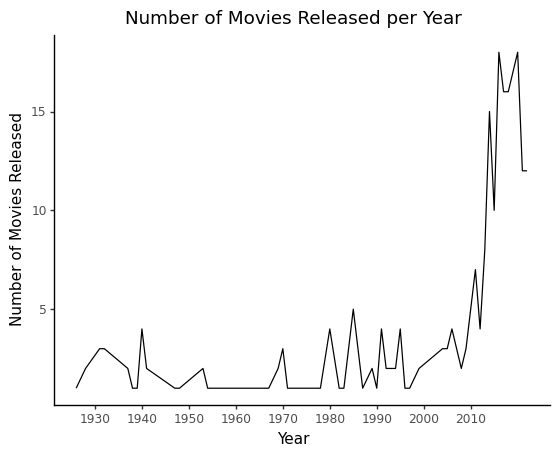

<ggplot: (158140175981)>

In [40]:
df_for_movies_to_year_chart = df3test["year"].sort_values()
df_for_movies_to_year_chart = pd.DataFrame(df_for_movies_to_year_chart.value_counts().sort_index())
df_for_movies_to_year_chart = df_for_movies_to_year_chart.reset_index()
df_for_movies_to_year_chart = df_for_movies_to_year_chart.rename(columns={"year":"number_of_movies","index":"year"})
df_for_movies_to_year_chart.loc[:,"year"] = df_for_movies_to_year_chart["year"].astype(int)

#learning lesson, .reset_index() resets the index to a column, creating a new column with the old index as values in the column


# change this to bar chart
( ggplot(df_for_movies_to_year_chart)  + 
 geom_line(aes(x="year", y="number_of_movies", group = 1)) + labs(title="Number of Movies Released per Year",x="Year",y="Number of Movies Released") + theme_classic() 
 + scale_x_continuous(breaks=range(1900,2020,10)))

# END OF CODE FOR INDIVIDUAL PROJECT WORK FOR MOVIES